# Capstone: Profile Based Job Matching Recommendation System

### Overall Contents:

- Background
- Data cleaning
- [Exploratory Data Analysis](#-3.-Exploratory-Data-Analysis) **(In this notebook)**
- Word Vectorization using CountVectorizer
- Word Vectorization using TFIDF-Vectorizer
- Final Recommender Model
- Cost Benefit Analysis
- Conclusion


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
import pyLDAvis
import pyLDAvis.sklearn

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

pd.set_option('display.max_colwidth', None)
sns.set()

## 3. Exploratory Data Analysis

### 3.1 Job Post Dataset

In [2]:
job_df = pd.read_csv("../datasets/clean_job_df.csv")

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### 3.1.1 EDA on Data Scientist

In [3]:
# Figuring out the order of the job types
job_df.JobPost_Job_Title.unique()

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['data_scientist', 'data_analyst', 'data_engineer'], dtype=object)

In [4]:
job_df

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Job_Title,Link,Queried_Salary,JobPost_Job_Title,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36afe3&fccid=281a27deb89bbe92&vjs=3,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c60bc&fccid=b584cf601069b5d0&vjs=3,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45d9b&fccid=b39fb6f124ce8586&vjs=3,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS', 'SQL', 'STATA', 'SPSS', 'Data Analysis', 'Python']",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a6328a&fccid=e9870e3159e9c6ac&vjs=3,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21ecc6&fccid=2c6850e24c8a2811&vjs=3,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R', 'Microsoft Office', 'Excel', 'Tableau', 'Data Science']",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3b57&fccid=2a57e13b156bc646&vjs=3,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', 'Java', 'Big Data', 'MySQL', 'Spark', 'Software Development', 'PostgreSQL', 'Python']",12,Intelliswift Software Inc,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5479,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2ba87&fccid=4a2d2fbadf14d480&vjs=3,>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB', 'Spark', 'REST', 'AWS']",8,Jobspring Partners,31.0,3.7,...,0,0,0,0,0,0,0,0,0,1
5480,5712,Executive Director- Architect: Data Engineering & Hybrid Clo...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed171e&fccid=c46d0116f6e69eae&vjs=3,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka', 'Java', 'Cassandra', 'S3', 'Spark', 'Kubernetes', 'CI', 'Design Experience', 'NoSQL', 'AWS']",13,JPMorgan Chase,21159.0,3.9,...,0,0,0,1,0,0,1,0,0,0
5481,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b94c&fccid=b85c5070c3d3d8c8&vjs=3,>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripting', 'SDLC', 'Scala', 'Perl', 'Kafka', 'Management Experience', 'Ansible', 'Java', 'Docker', 'Python', 'Military Experience', 'Jenkins']",15,Capital One,6791.0,4.0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
# filtering only data scientist in the dataset
data_scientist = job_df[job_df['JobPost_Job_Title']==job_df.JobPost_Job_Title.unique()[0]]

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


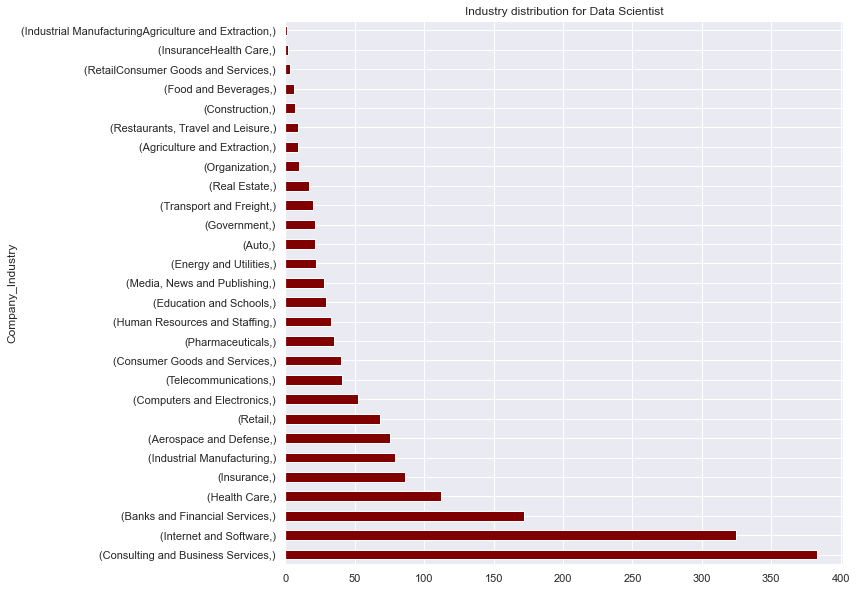

In [6]:
# Plotting the industry mentioned for data scientist
data_scientist[['Company_Industry']].dropna().value_counts().plot(kind='barh',figsize=(10,10),color='maroon',title='Industry distribution for Data Scientist');

###### Comments: 

From the barplot, we can observe that Data scientist are highly demanded not only in Internet and Software firms but also in traditional industries such as Consulting and business services,  Health Care, Banks and Financial Services.

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


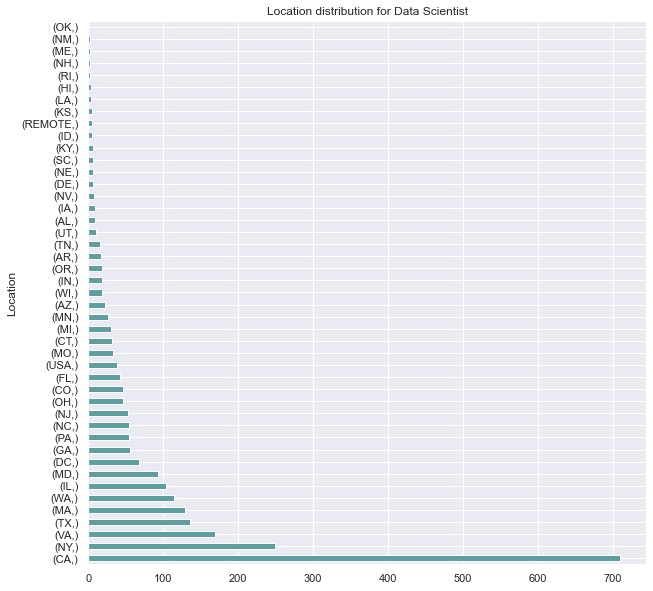

In [7]:
# Plotting the location of job posts mentioned for data scientist
data_scientist[['Location']].dropna().value_counts().plot(kind='barh',figsize=(10,10),color='cadetblue',title='Location distribution for Data Scientist');

###### Comments:
We can observed that there is very high demand for data scientist in Califonia which is expected as Silicon Valley is a region in the southern part of the San Francisco Bay Area in Northern California that serves as a global center for high technology and innovation.

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


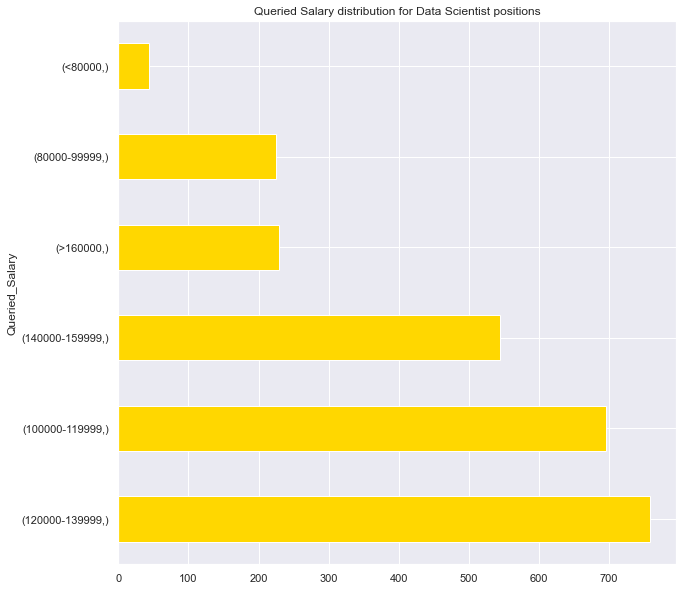

In [8]:
# Plotting the industry mentioned for data scientist
data_scientist[['Queried_Salary']].dropna().value_counts().plot(kind='barh',figsize=(10,10),color='gold',title='Queried Salary distribution for Data Scientist positions');

###### Comments:

From the barplot, it is stating that the dataset is mainly targeted at experience or senior level data scientist as the majority of the queried salary is from USD 100,000 annually onwards.

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


''

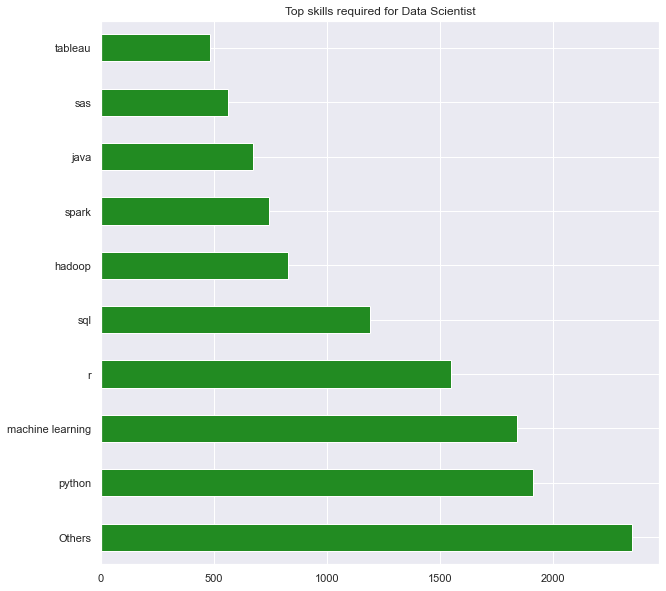

In [9]:
# Top Skills mentioned in the posting for Data Scientist using the original columns provided in the dataset
data_scientist[['python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others']].sum().sort_values(ascending=False).plot(kind='barh',figsize=(10,10),color='forestgreen',title='Top skills required for Data Scientist')
;


###### Comments:

Python and machine learning are highly sought for data scientist candidates. 

#### 3.1.2 EDA on Data Analyst

In [10]:
# filtering only data analyst in the dataset
data_analyst = job_df[job_df['JobPost_Job_Title']==job_df.JobPost_Job_Title.unique()[1]]

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


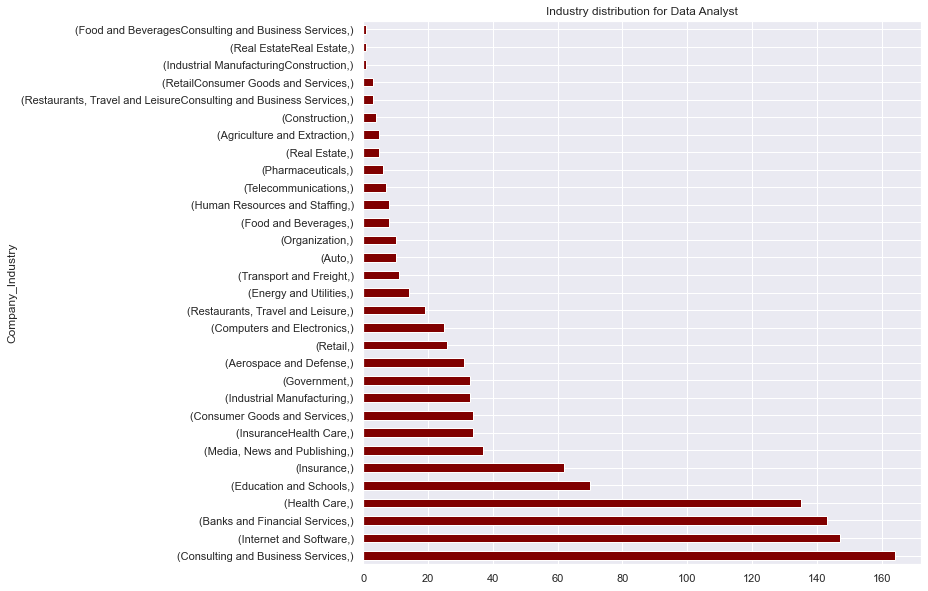

In [11]:
# Plotting the industry mentioned for data analyst
data_analyst[['Company_Industry']].dropna().value_counts().plot(kind='barh',figsize=(10,10),color='maroon',title='Industry distribution for Data Analyst');

###### Comments: 

From the plot, we can observe that the demand for Data Analyst is similar to Data Scientist in the various sectors but if we were to compare to the number of postings, it is actually much lesser as compared to Data Scientist in terms of count.

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


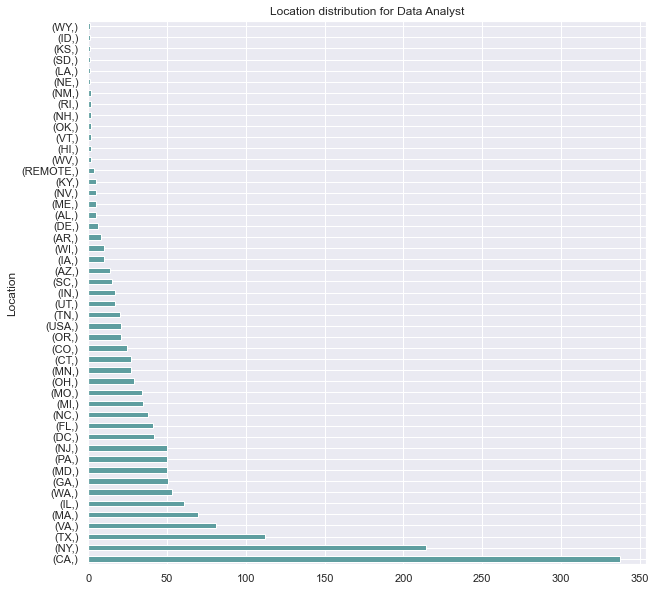

In [12]:
# Plotting the location of job posts mentioned for data analyst
data_analyst[['Location']].dropna().value_counts().plot(kind='barh',figsize=(10,10),color='cadetblue',title='Location distribution for Data Analyst');

###### Comments:
We can observed that there is very high demand for Data Analyst as well in Califonia which may be due to Silicon Valley serving as a global center for high technology and innovation.

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


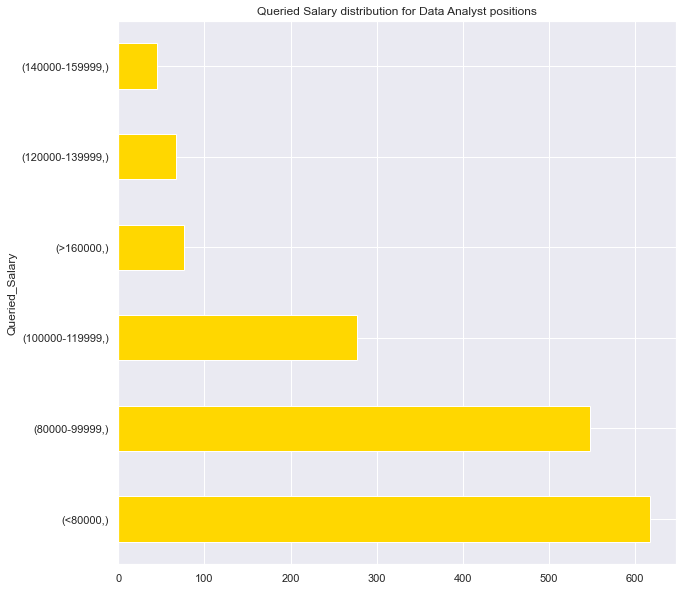

In [13]:
# Plotting the industry mentioned for data analyst
data_analyst[['Queried_Salary']].dropna().value_counts().plot(kind='barh',figsize=(10,10),color='gold',title='Queried Salary distribution for Data Analyst positions');

###### Comments:

From the barplot, it is stating that the dataset is mainly targeted at junior level data analyst as the majority of the queried salary is below USD 100,000 which defers from data scientist.

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


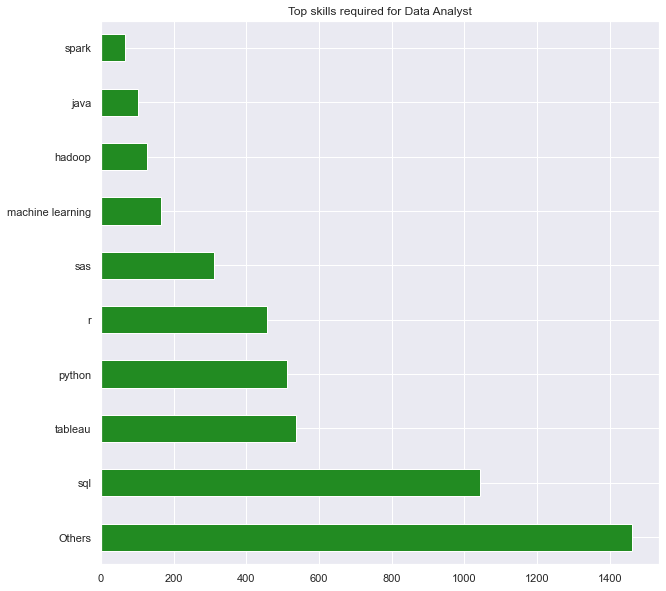

In [14]:
# Top Skills mentioned in the posting for Data Analyst using the original columns provided in the dataset
data_analyst[['python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others']].sum().sort_values(ascending=False).plot(kind='barh',figsize=(10,10),color='forestgreen',title='Top skills required for Data Analyst');

###### Comments:

The more commonly skills sought for data analyst are sql and tableau which defers from data scientist. 

#### 3.1.3 EDA on Data Engineer

In [15]:
# filtering only data engineer in the dataset
data_engineer = job_df[job_df['JobPost_Job_Title']==job_df.JobPost_Job_Title.unique()[2]]

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


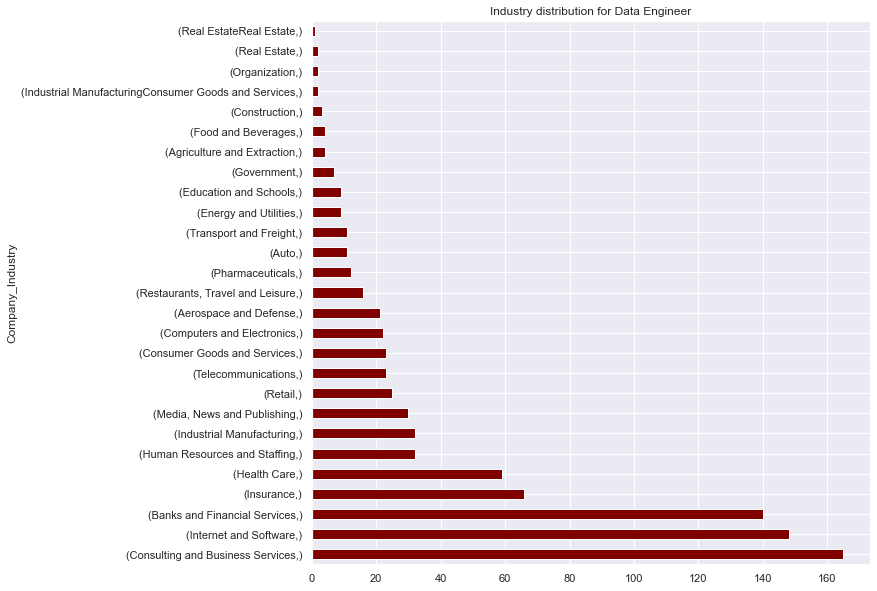

In [16]:
# Plotting the industry mentioned for data engineer
data_engineer[['Company_Industry']].dropna().value_counts().plot(kind='barh',figsize=(10,10),color='maroon',title='Industry distribution for Data Engineer');

###### Comments: 

From the plot we can see that the top mentioned industries are fairly similar but data enginner also have insurance firms welcoming them.

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


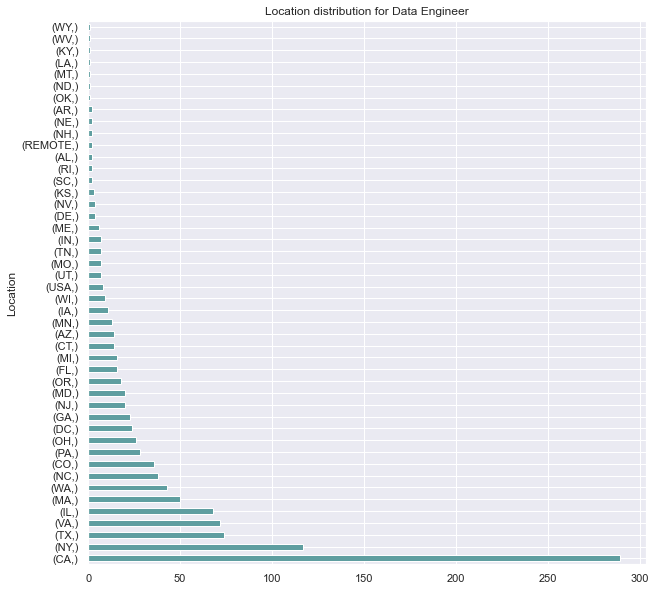

In [17]:
# Plotting the location of job posts mentioned for Data Engineer
data_engineer[['Location']].dropna().value_counts().plot(kind='barh',figsize=(10,10),color='cadetblue',title='Location distribution for Data Engineer');

###### Comments:
We can observed that there is very high demand for Data Engineer as well in Califonia which may be due to Silicon Valley serving as a global center for high technology and innovation.

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


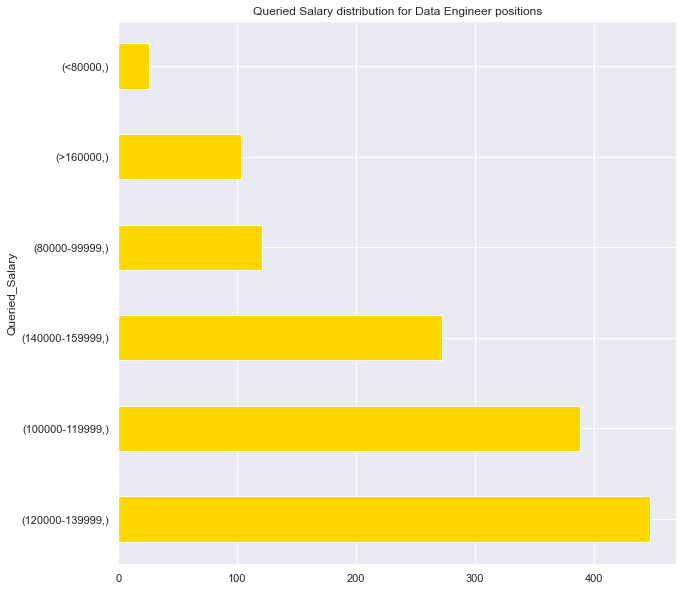

In [18]:
# Plotting the industry mentioned for data engineer 
data_engineer[['Queried_Salary']].dropna().value_counts().plot(kind='barh',figsize=(10,10),color='gold',title='Queried Salary distribution for Data Engineer positions');

###### Comments:

From the barplot, it is stating that the dataset is mainly targeted at experience or senior level data enginneer as the majority of the queried salary similarly to Data Scientist.

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


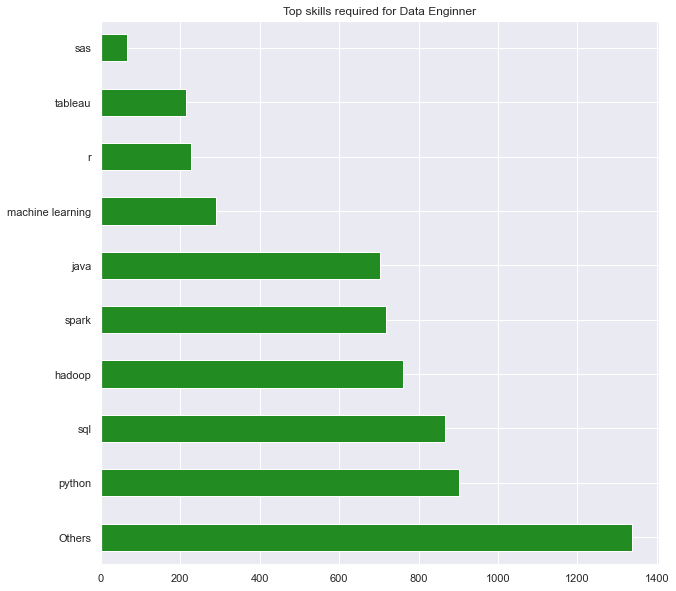

In [19]:
# Top Skills mentioned in the posting for Data Engineer using the original columns provided in the dataset
data_engineer[['python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others']].sum().sort_values(ascending=False).plot(kind='barh',figsize=(10,10),color='forestgreen',title='Top skills required for Data Enginner');

###### Comments:

The more commonly skills sought for data engineer are python and sql which defers from both data scientist and analyst. 

#### 3.1.4 Pre-processing on job posting dataset

In [20]:
job_df.head()

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Job_Title,Link,Queried_Salary,JobPost_Job_Title,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36afe3&fccid=281a27deb89bbe92&vjs=3,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c60bc&fccid=b584cf601069b5d0&vjs=3,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45d9b&fccid=b39fb6f124ce8586&vjs=3,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS', 'SQL', 'STATA', 'SPSS', 'Data Analysis', 'Python']",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a6328a&fccid=e9870e3159e9c6ac&vjs=3,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21ecc6&fccid=2c6850e24c8a2811&vjs=3,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R', 'Microsoft Office', 'Excel', 'Tableau', 'Data Science']",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# Decided to do up my own list of skills as others are top in all jobs

job_post_skills = job_df[['Unnamed: 0','JobPost_Job_Title','Skill']]

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# created a function to clean the skill column
def cleaner(text):
    """
    Inputs the string in skill.
    Outputs a clean version of it removing the special character.
    """
    text = text.lower()
    text = re.sub(r"\[|\]","",text)
    text = re.sub(r' ','_',text)
    text = re.sub(r',_','',text)
    text = re.sub(r"\''",' ',text)

    return text

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Applying the cleaning function to the skills column
job_post_skills.Skill=job_post_skills.Skill.apply(cleaner)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\leeyu\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
# Checking on the outcome
job_post_skills.head()

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,JobPost_Job_Title,Skill
0,0,data_scientist,'sap sql'
1,1,data_scientist,'machine_learning r sas sql python'
2,2,data_scientist,'data_mining data_management r sas sql stata spss data_analysis python'
3,3,data_scientist,'certified_internal_auditor'
4,4,data_scientist,'statistical_software time_management r microsoft_office excel tableau data_science'


In [25]:
# Creating a job post id using for loop
for i in range(len(job_post_skills['Unnamed: 0'])):
    job_post_skills['Unnamed: 0'][i] = i+1 
job_post_skills["JobPost_Job_id"] = job_post_skills.JobPost_Job_Title.str.cat(job_post_skills["Unnamed: 0"].astype(str),sep="_")
job_post_skills=job_post_skills[["JobPost_Job_id","JobPost_Job_Title","Skill"]]

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-42de4baee09c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_post_skills['Unnamed: 0'][i] = i+1
C:\Users\leeyu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.

In [26]:
#Checking if the changes are inplace
job_post_skills.head()

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,JobPost_Job_id,JobPost_Job_Title,Skill
0,data_scientist_1,data_scientist,'sap sql'
1,data_scientist_2,data_scientist,'machine_learning r sas sql python'
2,data_scientist_3,data_scientist,'data_mining data_management r sas sql stata spss data_analysis python'
3,data_scientist_4,data_scientist,'certified_internal_auditor'
4,data_scientist_5,data_scientist,'statistical_software time_management r microsoft_office excel tableau data_science'


In [27]:
# Instantiate then fit and transform the skills into vectors. 
cvec = CountVectorizer(ngram_range=(1,1),min_df=2,token_pattern='\w+')
job_cvec = cvec.fit_transform(job_post_skills.Skill)
job_post_skills = pd.concat([job_post_skills,pd.DataFrame(job_cvec.todense(), columns = cvec.get_feature_names())],axis=1)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-27-aaa761b83ae8>:2: DeprecationWarning: invalid escape sequence \w
  cvec = CountVectorizer(ngram_range=(1,1),min_df=2,token_pattern='\w+')


In [28]:
# Dropping skill columns
job_post_skills.drop(columns=['Skill'],inplace=True)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


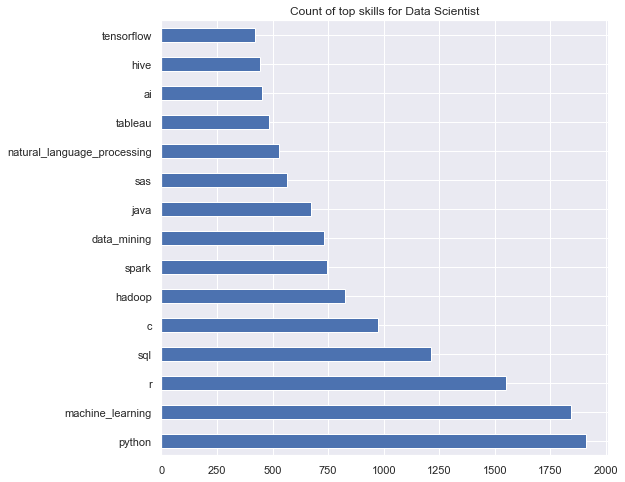

In [29]:
# Bar plot to show the top skills for Data Scientist
job_post_skills.loc[job_post_skills['JobPost_Job_Title']==job_post_skills.JobPost_Job_Title.unique()[0]].iloc[:,2:].sum().sort_values(ascending=False).to_frame().head(15).plot(
    kind='barh',legend=False,title='Count of top skills for Data Scientist',figsize=(8,8));
# plt.savefig("../images/DS_skills.png",bbox_inches='tight');

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


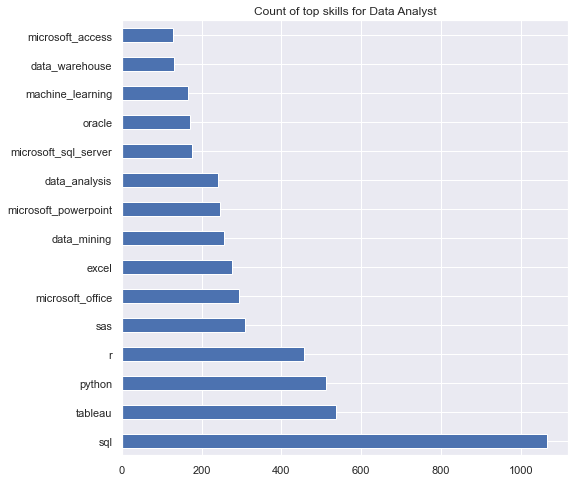

In [30]:
# Bar plot to show the top skills for Data Analyst
job_post_skills.loc[job_post_skills['JobPost_Job_Title']==job_post_skills.JobPost_Job_Title.unique()[1]].iloc[:,2:].sum().sort_values(ascending=False).to_frame().head(15).plot(
    kind='barh',legend=False,title='Count of top skills for Data Analyst',figsize=(8,8));
# plt.savefig("../images/DA_skills.png",bbox_inches='tight');

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


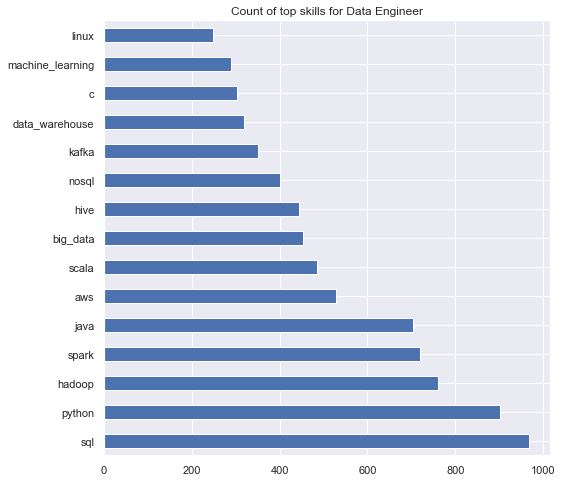

In [31]:
# Bar plot to show the top skills for Data Engineer
job_post_skills.loc[job_post_skills['JobPost_Job_Title']==job_post_skills.JobPost_Job_Title.unique()[2]].iloc[:,2:].sum().sort_values(ascending=False).to_frame().head(15).plot(
    kind='barh',legend=False,title='Count of top skills for Data Engineer',figsize=(8,8));
# plt.savefig("../images/DE_skills.png",bbox_inches='tight');

###### Comments:

By generating our own list of skills, we can better identify skills that were listed as others such as tensorflow, natural_learning_processing, nosql etc. Also, we can observed that there are several similar skills identified between them such as SQL, python. There are also skills that seperates the 3 like for instance data scientist requires a more specialize skillset like natural language processing or machine learning which isn't mentioned in the other 2 jobs titles.

In [32]:
# Realized that there are skills with value above 1
# We should only have binary values to indicate if it appears on the candidate's resume
job_post_skills.iloc[:,2:].max().sort_values(ascending=False)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


sql                 3
c                   3
icd                 2
tcp                 2
ci                  2
                   ..
google_analytics    1
google_adwords      1
go                  1
git                 1
zookeeper           1
Length: 376, dtype: int64

In [33]:
# Remapping the values to binary
job_post_skills.iloc[:,2:] = job_post_skills.iloc[:,2:].applymap(lambda x: 0 if x == 0 else 1)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# Ensuring the change is in place
job_post_skills.iloc[:,2:].max().sort_values(ascending=False)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Generating samples of our datasets
job_post_skills.sample(5)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,JobPost_Job_id,JobPost_Job_Title,10,4g,9,_program_management,_project_,accounting,ach,active_directory,...,web_development,websphere,weka,windows,wordpress,workday,xml,xquery,xslt,zookeeper
432,data_scientist_433,data_scientist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2704,data_analyst_2705,data_analyst,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5293,data_engineer_5294,data_engineer,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4383,data_engineer_4384,data_engineer,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5435,data_engineer_5436,data_engineer,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Commented the codes to prevent it from executing
# job_post_skills.to_csv("../datasets/final_job_df.csv",index=False)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 3.2 Resume Dataset

In [37]:
resume_df = pd.read_csv("../datasets/clean_resume_df.csv")

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
resume_df.head(1)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0 Resume_Job_Title  \
0           0   Data Scientist   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [39]:
resume_df.head()

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0 Resume_Job_Title  \
0           0   Data Scientist   
1           1   Data Scientist   
2           2   Data Scientist   
3           3   Data Scientist   
4           4   Data Scientist   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

#### 3.2.1 n_gram = 1, singular words with highest frequency

In [40]:
tfidf = TfidfVectorizer(ngram_range=(1,1),min_df=2,max_df=0.95,token_pattern='\w+',stop_words='english')

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-40-e6966513fdb7>:1: DeprecationWarning: invalid escape sequence \w
  tfidf = TfidfVectorizer(ngram_range=(1,1),min_df=2,max_df=0.95,token_pattern='\w+',stop_words='english')


In [41]:
resume_tfidf = tfidf.fit_transform(resume_df.clean_resume)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
pd.DataFrame(resume_tfidf.todense(), columns = tfidf.get_feature_names()).sum().sort_values(ascending=False).head(20)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


data            157.829844
using           142.833943
web             120.763847
database        115.219251
exprience       111.728805
security        106.457257
project         102.666245
sql              97.063483
developer        93.765853
endorsements     93.601430
months           93.157703
details          91.585605
python           91.001037
management       89.884750
application      85.584420
java             81.749637
development      80.094089
used             79.787910
network          78.780869
business         75.790801
dtype: float64

#### 3.2.2 n_gram = 2, (bigram) words with highest frequency

In [43]:
tfidf = TfidfVectorizer(ngram_range=(2,2),min_df=2,max_df=0.95,token_pattern='\w+',stop_words='english')

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-43-fdc2916a6be1>:1: DeprecationWarning: invalid escape sequence \w
  tfidf = TfidfVectorizer(ngram_range=(2,2),min_df=2,max_df=0.95,token_pattern='\w+',stop_words='english')


In [44]:
resume_tfidf = tfidf.fit_transform(resume_df.clean_resume)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
pd.DataFrame(resume_tfidf.todense(), columns = tfidf.get_feature_names()).sum().sort_values(ascending=False).head(20)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


exprience months          55.144526
exprience thanyear        38.359944
data science              34.794368
web services              33.359018
sql server                31.901655
thanyear months           31.582586
details company           30.341325
machine learning          27.149081
web developer             25.697728
database administrator    25.620816
html css                  24.158803
skill details             23.849359
java developer            23.399079
work experience           22.666238
employment duration       22.659523
project manager           21.401405
python developer          20.595469
monthscompany details     19.570149
end developer             19.189371
using python              19.102480
dtype: float64

##### 3.2.3 n_gram = 3, (trigrams) words with highest frequency

In [46]:
tfidf = TfidfVectorizer(ngram_range=(3,3),min_df=2,max_df=0.95,token_pattern='\w+',stop_words='english')

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-46-565599c69581>:1: DeprecationWarning: invalid escape sequence \w
  tfidf = TfidfVectorizer(ngram_range=(3,3),min_df=2,max_df=0.95,token_pattern='\w+',stop_words='english')


In [47]:
resume_tfidf = tfidf.fit_transform(resume_df.clean_resume)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
pd.DataFrame(resume_tfidf.todense(), columns = tfidf.get_feature_names()).sum().sort_values(ascending=False).head(20)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


exprience thanyear months           31.394889
employer work experience            22.340916
work employer work                  22.336353
authorized work employer            22.189309
end web developer                   21.151835
monthscompany details company       19.069405
highly skilled endorsed             17.277035
new york ny                         16.067300
exprience monthscompany details     14.855597
date applicable expiration          13.731687
applicable expiration date          13.731687
expiration date certification       13.731687
date certification licenseissued    13.287379
html css javascript                 13.147736
additional information skills       11.734618
attended expected graduation        11.109981
share indeedassessments com         10.993156
results https share                 10.993156
https share indeedassessments       10.993156
indeedassessments com share         10.993156
dtype: float64

###### Comments:

These are the top words using different n_grams on the resume dataset. The words were not simplified using either stemming or lemmatization because we would want the skills to be captured in their original wording else it would be tough to guess the lemmatized version of the skillset. 
From the results we can observe that there are majority of words that is unrelated to skills, this is because we are extracting from the entire context of the resume plus we are only using the default stop words from sklearn. Therefore we can extend the stop words to include action verbs. 
A decision has been made to use n_gram(1,3) for the vectorization.

### 3.3 Topic Modeling visualization using pyLDAvis

#### 3.3.1 Using TFIDF-Vectorizer to vectorize resume

In [49]:
# Reference from Ng Wai Foong,
# https://towardsdatascience.com/introduction-to-topic-modeling-using-scikit-learn-4c3f3290f5b9

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for i, topic in enumerate(model.components_):
        if not topic_names or not topic_names[i]:
            print("\nTopic ", i+1)
        else:
            print("\nTopic: '",topic_names[i],"'")
        print(", ".join([feature_names[i]
                       for i in topic.argsort()[:-no_top_words - 1:-1]]))

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
component_count = resume_df.Resume_Job_Title.nunique()
component_names = [f'Topic {component_num+1}' for component_num in range(component_count)]

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
tfidf = TfidfVectorizer(ngram_range=(1,3),min_df=10,stop_words='english')

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
resume_tfidf = tfidf.fit_transform(resume_df.clean_resume)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# Reference from github user, AlohaJenny.
# https://github.com/alohajenny/Candidate-Resume-Recommendation-Engine/blob/master/03%20Topic%20Modeling%20%26%20Recommendation%20Engine.ipynb
lda = LatentDirichletAllocation(n_components=component_count, # Number of topics
                                learning_method = 'online',
                                random_state=42,
                                verbose=1,
                                n_jobs = -1)  # Use all available CPUs

doc_topic = lda.fit_transform(resume_tfidf)

topic_word = pd.DataFrame(lda.components_.round(3),
                          index = component_names,
                          columns = tfidf.get_feature_names())

resume_doc_topic_lda = pd.DataFrame(doc_topic.round(5), 
                                    index=resume_df['clean_resume'], 
                                    columns = component_names)


C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [54]:
display_topics(lda, tfidf.get_feature_names(), 20)


Topic  1
creation data, date bny mellon, analytic, 5k 7k, work experience security, special projects, ny aprilto, graduation skills, work supervisors plan, executed test, thanyear months jquery, depth, serversfine tuning existing, based gui, release, plans monitor, provide solutions utilized, sacramento, python thanyear, usa air land

Topic  2
court, details, hr, details company, paper, education details mba, hr skill details, hr skill, company details, skill details company, details mba, details company details, company, college, company details company, law, advocate, mba, matters, college engineering

Topic  3
details, bba, hr skill details, transformers, hr skill, details company description, details company, hr, kisan, maharashtra, jalgaon, winding core, core assembly core, maharashtra state, exprience monthscompany details, company description, skill, examination, core assembly, exprience

Topic  4
bny mellon, bny, prepaid, mellon, key contributions, description key contribution

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
lda_vis = pyLDAvis.sklearn.prepare(lda, resume_tfidf, tfidf, mds='tsne', R=10)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\leeyu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [56]:
# Plotting Intertopic Distance Map
pyLDAvis.enable_notebook()

lda_vis

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
20      76.560532 -100.569489       1        1  90.184815
3       90.942192  -27.441830       2        1   1.305266
29       1.539779 -115.165802       3        1   0.879796
17    -113.675156   -7.891209       4        1   0.719904
31     -79.864670  -35.948456       5        1   0.649551
25     -85.889648   70.755646       6        1   0.563717
10      37.399254   79.030975       7        1   0.519728
27    -111.504372  -55.996929       8        1   0.473867
22     -44.644806  -57.727596       9        1   0.438374
5      -59.387188   42.176289      10        1   0.398960
26     -41.204319   14.608676      11        1   0.331668
28     -93.545067   27.265354      12        1   0.168303
18     -37.741032  -95.100044      13        1   0.168303
24     -22.381472   43.454300      14        1   0.168303
23      -3.827308   76.591293      15        1   0.168303
21     -70.881477   -0.227037      16        1   0.168303
30     -15.552079  -39.127281      17        1   0.168303
19      54.337460  -52.414768      18        1   0.168303
0       -3.877495   16.971476      19        1   0.168303
1       29.892551   13.007064      20        1   0.168303
15     -47.620308  -24.243708      21        1   0.168303
14      27.024212  -79.829300      22        1   0.168303
13     -21.191833   -8.550042      23        1   0.168303
12     -73.963905  -77.950211      24        1   0.168303
11      42.991730  -19.208454      25        1   0.168303
9        9.643768  -13.847526      26        1   0.168303
8       17.317612  -45.179474      27        1   0.168303
7       67.822380    7.479867      28        1   0.168303
6       54.320210   41.796997      29        1   0.168303
4       -8.917598  -71.414185      30        1   0.168303
2       15.054922   44.488525      31        1   0.168303
16     -41.411793   76.620483      32        1   0.168303, topic_info=                        Term       Freq      Total Category  logprob  loglift
25381                machine  30.000000  30.000000  Default  10.0000  10.0000
47124                various  30.000000  30.000000  Default   9.0000   9.0000
10462              databases  30.000000  30.000000  Default   8.0000   8.0000
26623              marketing  31.000000  31.000000  Default   7.0000   7.0000
21919               involved  30.000000  30.000000  Default   6.0000   6.0000
...                      ...        ...        ...      ...      ...      ...
2866           arts commerce   0.001757   1.559158  Topic32 -10.8064  -0.4013
10616                   days   0.001757   3.288958  Topic32 -10.8064  -1.1478
16550       exprience months   0.001757  35.058268  Topic32 -10.8064  -3.5142
2867   arts commerce science   0.001757   1.559150  Topic32 -10.8064  -0.4013
16549              exprience   0.001757  56.711419  Topic32 -10.8064  -3.9952

[715 rows x 6 columns], token_table=       Topic      Freq                                    Term
term                                                          
150        1  1.158638                      abacus electronics
400        1  1.045641                              accounting
546        1  1.194126         active directory administration
830        1  0.858938  administration business administration
997        1  1.028436                                advocate
...      ...       ...                                     ...
47124      1  1.003737                                 various
47869      1  0.998526                                     web
48014      1  0.997959                            web services
48552      1  0.971197                work experience security
48912      1  0.990207                                workshop

[140 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 4, 30, 18, 32, 26, 11, 28, 23, 6, 27, 29, 19, 25, 24, 22, 31, 20, 1, 2, 16, 15, 14, 1

#### 3.3.2 Using CountVectorizer to vectorize resume

In [57]:
cvec = CountVectorizer(ngram_range=(1,3),min_df=10,stop_words='english')

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
resume_cvec = cvec.fit_transform(resume_df.clean_resume)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
# Reference from github user, AlohaJenny.
# https://github.com/alohajenny/Candidate-Resume-Recommendation-Engine/blob/master/03%20Topic%20Modeling%20%26%20Recommendation%20Engine.ipynb
lda = LatentDirichletAllocation(n_components=component_count, # Number of topics
                                learning_method = 'online',
                                random_state=42,
                                verbose=1,
                                n_jobs = -1)  # Use all available CPUs

doc_topic = lda.fit_transform(resume_cvec)

topic_word = pd.DataFrame(lda.components_.round(3),
                          index = component_names,
                          columns = cvec.get_feature_names())

resume_doc_topic_lda = pd.DataFrame(doc_topic.round(5), 
                                    index=resume_df['clean_resume'], 
                                    columns = component_names)


C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [60]:
display_topics(lda, cvec.get_feature_names(), 20)


Topic  1
exprience months, exprience, months, description, project, details, sales, company, maharashtra, application, nagpur, college, maharashtra state, state board, monthscompany details, monthscompany, monthscompany details company, roles, skill, responsibility

Topic  2
pivotal, j2ee stack, j2ee stack developer, java j2ee stack, struts jsp, spring orm, core spring, developer java j2ee, spring jdbc spring, business components, application configuration, implemented log4j, framework ioc, jdbc spring orm, business classes, spring data jpa, spring services, spring core spring, data jpa, marshalling

Topic  3
date, months, exprience, yrs, duration, thanyear, exprience thanyear, java, exprience thanyear months, thanyear months, exprience months, technologies, attended, tools technologies, python, aug, programming, company, details, computer

Topic  4
using, spring, application, developed, used, javascript, js, web, jquery, java, ajax, involved, css, hibernate, services, ui, framework, 

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
lda_vis = pyLDAvis.sklearn.prepare(lda, resume_cvec, cvec, mds='tsne', R=10)

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\leeyu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [62]:
# Plotting Intertopic Distance Map
pyLDAvis.enable_notebook()

lda_vis

C:\Users\leeyu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
19      50.521549    3.748878       1        1  18.481615
3       94.327248   89.963684       2        1  17.595237
13      -8.445603  -75.139595       3        1  14.484309
7        0.311313  -36.841251       4        1  10.672598
11      32.567059  128.525803       5        1   5.818916
25      84.294586  -15.932114       6        1   5.046436
21    -120.344444  -13.466019       7        1   3.061817
26     -47.184895  -57.836803       8        1   2.910628
5      -88.775650   92.955696       9        1   2.833256
16      77.769730 -115.202560      10        1   2.511123
2      -41.669155 -110.770844      11        1   1.841991
14      79.425400   38.320412      12        1   1.654540
23     119.843376  -69.501068      13        1   1.576470
0       71.914139  -60.196133      14        1   1.495879
8      124.106659   35.218075      15        1   1.220711
15     -95.246422  -67.869370      16        1   1.195736
30      38.546524  -33.093510      17        1   1.181408
4     -116.502678   44.200932      18        1   0.951174
22      35.281536   41.677029      19        1   0.791137
29     -31.852304  118.535263      20        1   0.750355
10      35.023911  -82.357880      21        1   0.732041
6       47.169682   81.642426      22        1   0.718611
18      12.800545 -123.043533      23        1   0.686586
27     -71.918274  -16.818317      24        1   0.618053
17     131.982986  -14.965340      25        1   0.539055
24     -45.013920   67.768806      26        1   0.236469
12       0.314009   83.915863      27        1   0.179757
1      -72.936737   29.364733      28        1   0.118604
28       7.787771    5.070508      29        1   0.085905
31     -30.078125  -11.541484      30        1   0.003195
9       -3.385140   43.767139      31        1   0.003195
20     -33.470085   24.614231      32        1   0.003195, topic_info=                              Term          Freq         Total Category  \
9681                          data  24339.000000  24339.000000  Default   
14733                 endorsements   8391.000000   8391.000000  Default   
34475                       python   7503.000000   7503.000000  Default   
33537                      project  10482.000000  10482.000000  Default   
12290                    developer   6595.000000   6595.000000  Default   
...                            ...           ...           ...      ...   
3150              attending weekly      0.002200     62.527003  Topic32   
23906                        korea      0.002257    138.899896  Topic32   
1499         analysis endorsements      0.002279    583.638465  Topic32   
5653   certification licenseissued      0.002248    668.821595  Topic32   
14761            endorsements data      0.002206    708.508406  Topic32   

       logprob  loglift  
9681   10.0000  10.0000  
14733   9.0000   9.0000  
34475   8.0000   8.0000  
33537   7.0000   7.0000  
12290   6.0000   6.0000  
...        ...      ...  
3150  -10.6442   0.0967  
23906 -10.6189  -0.6761  
1499  -10.6093  -2.1020  
5653  -10.6228  -2.2518  
14761 -10.6415  -2.3281  

[800 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
50         1  0.009092                 12c
50         4  0.989172                 12c
144       29  0.870593                  a2
621        6  0.977333  activities project
646        1  0.229591            activity
...      ...       ...                 ...
49328      5  0.005930                  yr
49328      8  0.992335                  yr
49333     11  0.998881                 yrs
49346     25  0.973730              zaggle
49347     25  0.973730      zaggle prepaid

[2280 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 4, 14, 8, 12, 26, 22, 27, 6, 17, 3, 15, 24, 1, 9, 16, 31, 5, 23, 30

###### Comments:

**pyLDAvis** was used to identify and cluster skillsets from resumes that fall under different job titles. Countvectorizer definitely did better in clustering the words as compared to TFIDF as the topics are much better spread out but still, the results were not easily interpretable. <br>

For instance we can see the results for topic 1 of TFIDF-Vectorizer, which is the largest circle as it represents 90.2% of the entire tokenized words is probably categorized as a web developer related with keywords like SQL, web, developer, python, database etc. Similarly for CountVectorizer of topic 1, it is clustered as a web developer with the similar keywords like web, SQL, developer as well. <br>

However if were to compare topic 7, we can clearly identify that topic 7 is clustered as a data scientist related job using CountVectorizer but for TFIDF-Vectorizer it is difficult to deduce anything from it.  I have decided to leave topic modeling as part of EDA due to the inability to categorize my dataset.
